# Using the ixpe_file_model module

Requirements:

* [IXPEObsSim](https://bitbucket.org/ixpesw/ixpeobssim/src/master/)
* Python
* [PyXSPEC](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/index.html)
* [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface)

Documentation for IXPEObsSim:

https://cocalc.coolpulsars.org/636f9d55-17fa-4cc0-bb9c-ec4e36690581/raw/Neutron-Star-Atmosphere/ixpesw-ixpeobssim-572fa0092131/docs/_build/singlehtml/index.html#document-index

Similar documentation for XIMPOL:

https://buildmedia.readthedocs.org/media/pdf/ximpol/stable/ximpol.pdf

xwiki:

http://xwiki.ssdc.asi.it/xwiki/bin/view/Main/

Bitbucket:

https://bitbucket.org/ixpesw/ixpeobssim/src/master/


## Setting up the ixpe_file_model module


1.   You can find the [ixpe_file_model.py](https://github.com/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/config/ixpe_file_model.py) file in the [config](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config) directory in the [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface) repository.
2.   You should make a copy the ixpe_file_model module to create a configuration file for your particular source.  
3. All of the key parameters are defined located at the top of the module.
4. At a minimum, you must define the following parametrers:
* Position of the source: `ra`, `dec`.
* Spin frequency, frequency first and second derivative: `nu0`, `nudot`, `nuddot`.
* File with spectral and polarization data: filename.
* Magnetic dipole geometry: `alpha` and `beta.
5. There are a few optional parameters:
* You can renormalize the phase-averaged flux before absorption to have a fixed value or to follow a given spectrum with the `normflux` parameter.  `normflux` can be a floating point number, an array of values corresponding to the energies listed in `filename`, a function or filename.
* You can apply interstellar absorption with the `NH` parameter.  `NH` can be a floating point number for the hydrogen column density or a string with a floating point number and filename: e.g. `"1e22;tbabs.dat"`. 
* You can also normalize the phase-average flux after absorption with the finalnorm parameter.
* As final step, the module assumes that your spectrum is in the units of counts/s/cm<sup>2</sup>/keV.  If it is in erg/s/cm<sup>2</sup>/keV, set `intensity_energy_units=True`, and it will perform the needed conversion.
6. The various files should be in the [config/ascii](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config/ascii) directory.
7. The file that contains the spectral and polarization information (`filename`) must contain the following information with a header row at the top.
* Angle between the line of sight and the magnetic axis in radians: `Phi[rad]`
* Energy of radiation: `Energy[keV]`
* Intensity or flux: `I`
* Polarization with respect to the magnetic axis projected into the sky: `Q/I`

This file can contain other information, and the row and columns can be in any order.  The values of the angle and the energy must form a rectangular grid.
8. The file that contains the spectral renormalization information (`normflux`) must contain the following information with a header row at the top.
* Energy of radiation: `Energy[keV]`
* Flux: `I`
9. The file that contains the absoprtion cross section as a function of energy as defined in `NH` must contain the following information with a header row at the top.
* Energy of radiation in keV: `Energy`
* Cross section times <i>E</i><sup>3</sup> in units of 10<sup>-24</sup> cm<sup>2</sup> keV<sup>3</sup>: `sigma`.


## Components within the ixpe_file_model module

You can access all of the a forementioned parameters from outside the module as `ixpe_file_model.ra` for example.  There are many additional components defined with energy `E` in keV, inclination `i` in radians, phase `t` from 0 to 1:

* `energy_spectrum_inclination(E,i)`
* `ratio_inclination(E,i)`
* ` pol_deg(E, t, ra=None, dec=None)`
* `pol_ang(E, t, ra=None, dec=None)` in radians
* `rawspec(E,t)`: unabsorbed spectrum before renormalization
* `spec(E,t)`: absorbed counts spectrum after renormalization



 

## Load libraries

In [ ]:
import os     
import numpy
import matplotlib.pyplot as plt
from ixpeobssim import IXPEOBSSIM_CONFIG, IXPEOBSSIM_DATA, IXPEOBSSIM_DOC
import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.utils.logging_ import logger

## Configure the simulation.

In [ ]:
CFG_FILE = os.path.join(IXPEOBSSIM_CONFIG, 'ixpe_file_model.py')
OUT_FILE_PATH_BASE = os.path.join(IXPEOBSSIM_DATA, 'ixpe_file_model')
EVT_FILE_PATH = '%s.fits' % OUT_FILE_PATH_BASE
SIM_DURATION = 100000.
OUTPUT_FOLDER = os.path.join(IXPEOBSSIM_DOC, 'figures', 'showcase')


## Display the model

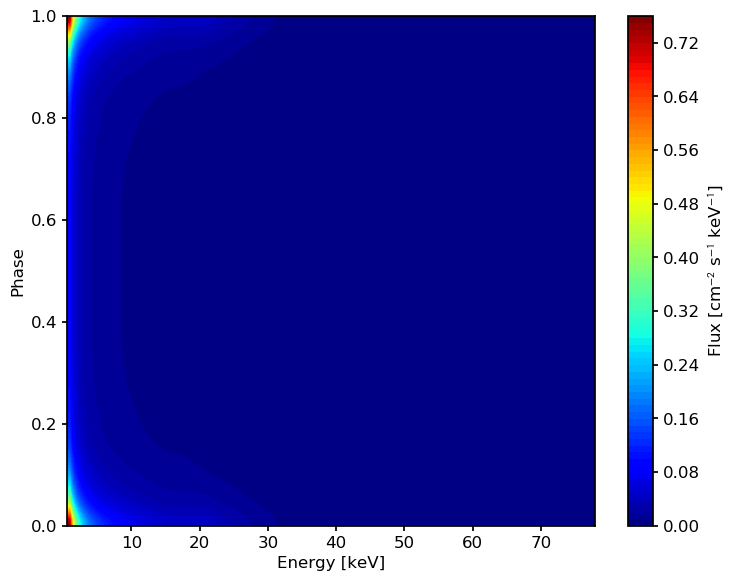

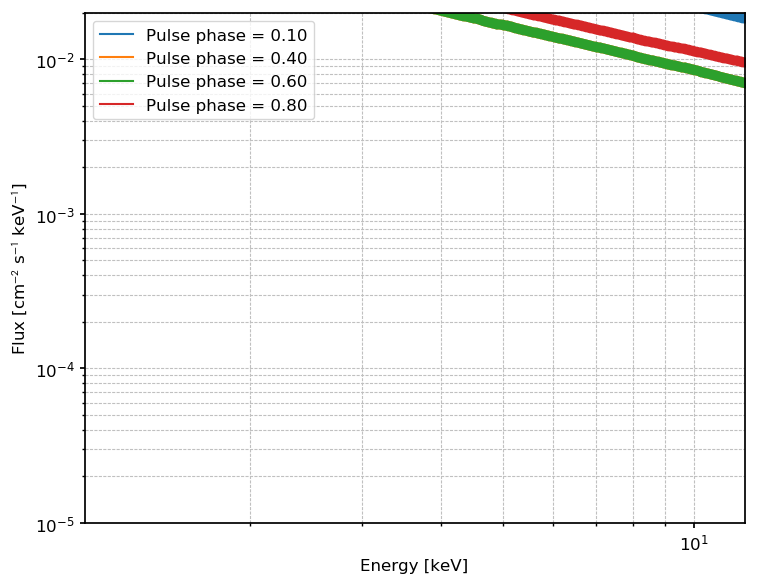

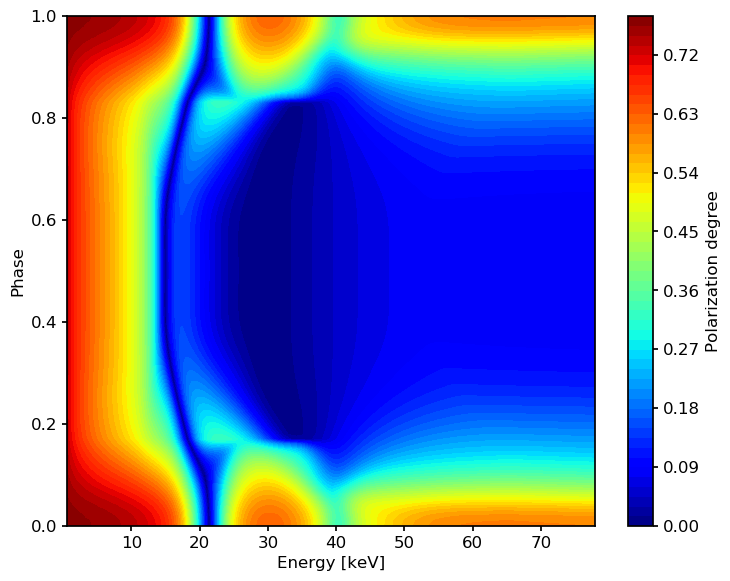

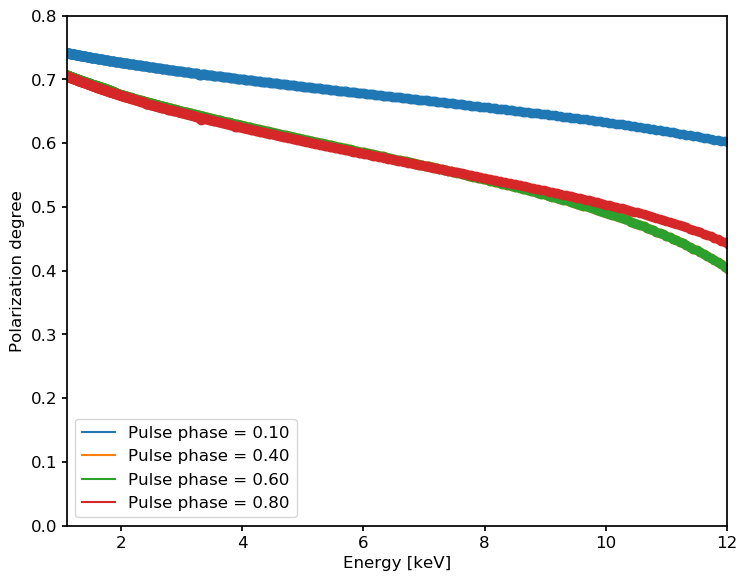

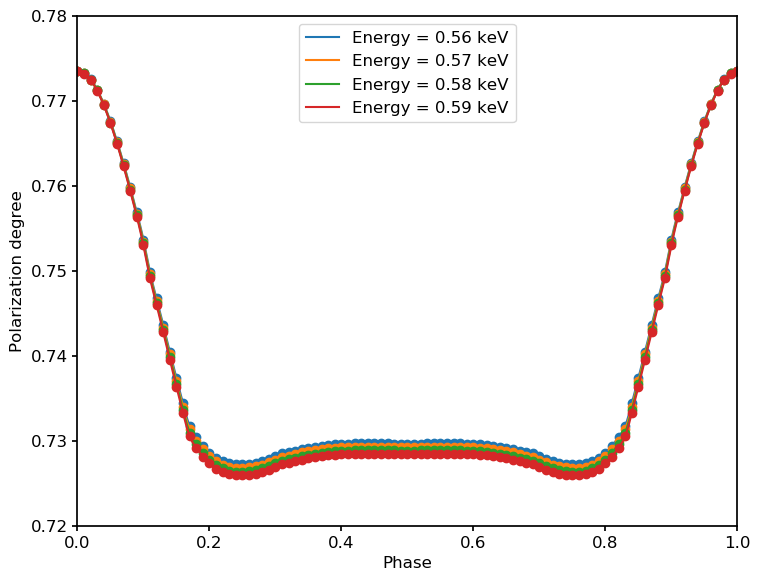

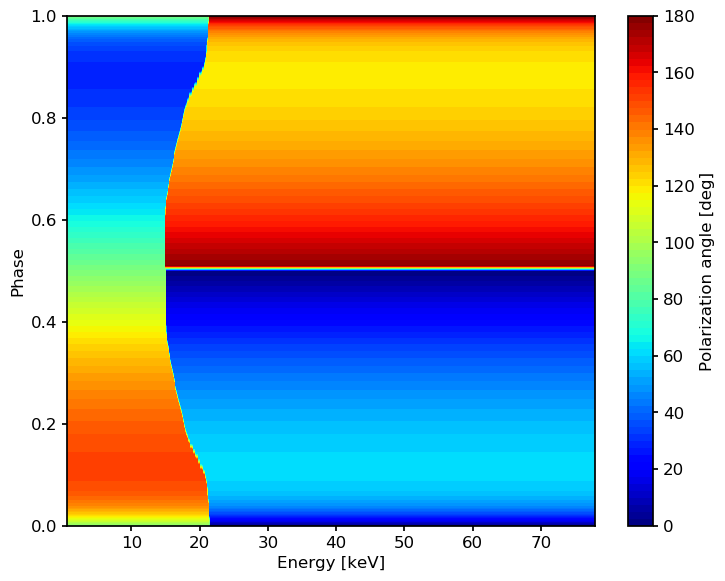

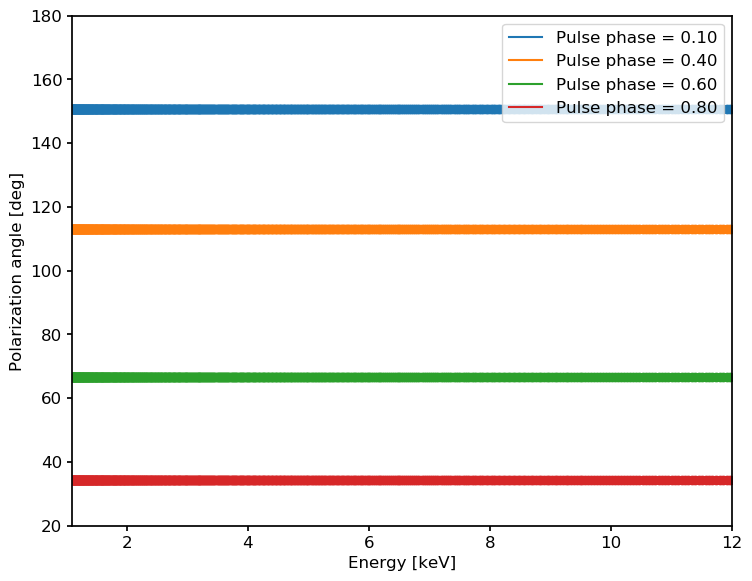

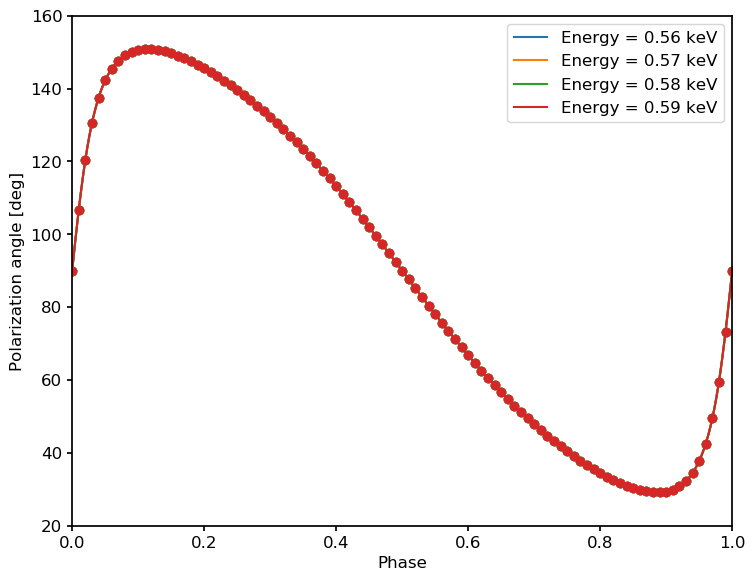

In [ ]:
import ixpeobssim.config.ixpe_file_model as magnetar
magnetar.display()

HerX1_NuSTAR.txt


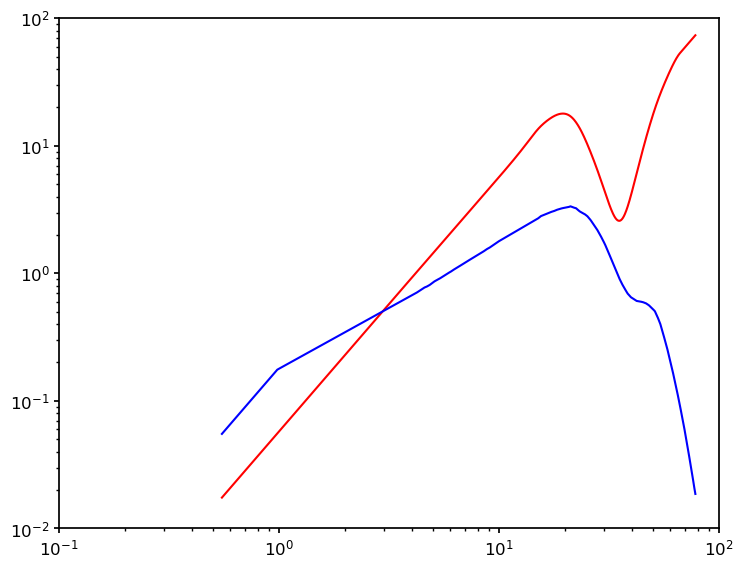

In [ ]:
import numpy as np
mfl=np.mean(magnetar.flux,axis=-1)
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*magnetar.meanflux/1e4,'r')
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*mfl,'b')
#plt.loglog(magnetar.narr['EnergykeV'],magnetar.narr['I']*magnetar.narr['EnergykeV']**2)
print(magnetar.normflux)

## Perform the simulation

In [ ]:
EVT_FILE_PATH = pipeline.xpobssim(configfile=CFG_FILE, duration=SIM_DURATION)

>>> Setting output file base name to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model...


>>> Setting up the source model...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> ROI centered at (26.5934, 61.7509):
- xPeriodicPointSource "4U 0142+61" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 6.851e-09 erg/cm2/s (342.56 mcrab)
    Position: RA = 26.5933625 deg, Dec = 61.7508861111 deg
    Ephemeris: t0 = 0.0 s, nu0 = 0.11509211554 Hz, nudot = -2.6783806e-14 Hz/s, nuddot = 0.0 Hz/s^2


>>> Done [t0 + 2.026 s].


>>> Setting the random seed to 1292244898...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu1vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu1psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 2.915 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 454115 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 454115/454115 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.159 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 454115/454115 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.051 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 450186/454115 (99.13%) events remaining, deadtime correction 0.991.


>>> Running time for apply_dead_time(): 0.221 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   450186R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   450186R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Done for detector unit # 1 [t0 + 9.572 s].


>>> Setting the random seed to 1292244899...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu2vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu2psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 10.399 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 455117 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 455117/455117 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.106 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 455117/455117 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.033 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 451198/455117 (99.14%) events remaining, deadtime correction 0.991.


>>> Running time for apply_dead_time(): 0.261 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   451198R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   451198R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Done for detector unit # 2 [t0 + 16.636 s].


>>> Setting the random seed to 1292244900...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu3vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu3psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 17.472 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 455610 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 455610/455610 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.084 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 455610/455610 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.018 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 451669/455610 (99.14%) events remaining, deadtime correction 0.991.


>>> Running time for apply_dead_time(): 0.312 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   451669R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   451669R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Done for detector unit # 3 [t0 + 23.810 s].


>>> All done [t0 + 23.811 s]!


In [ ]:
EVT_FILE_PATH

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits']

# Basic Analysis

## Generate a count map and plot it

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   450186R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451198R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451669R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


INFO: Auto-setting vmin to -6.733e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.474e+04 [aplpy.core]


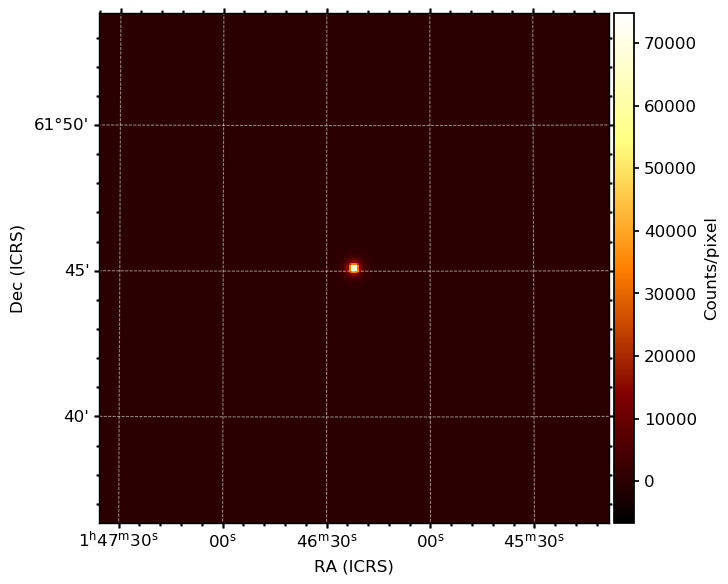

In [ ]:

from ixpeobssim.evt.binning import xBinnedMap
 
cmap_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='CMAP')
count_map = xBinnedMap.from_file_list(cmap_file_list)
count_map.plot()


## Generate a light curve

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   450186R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451198R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451669R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


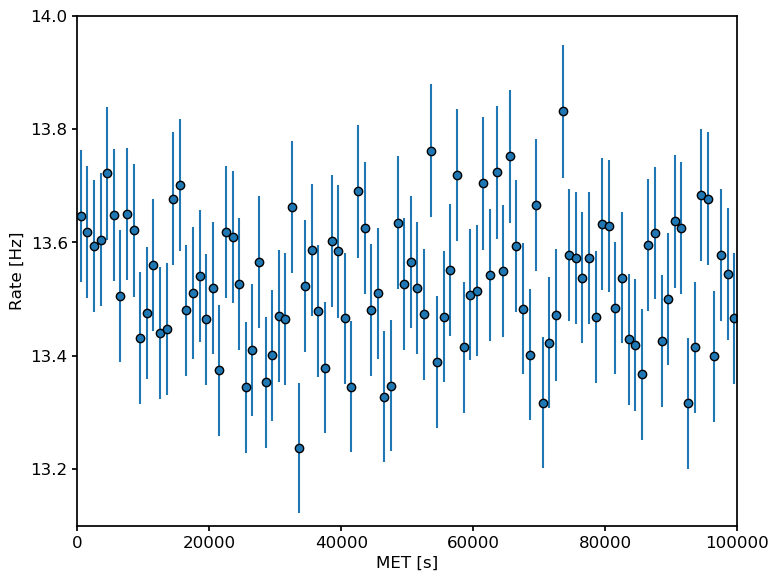

In [ ]:
from ixpeobssim.evt.binning import xBinnedLightCurve

lc_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='LC')
count_lc = xBinnedLightCurve.from_file_list(lc_file_list)
count_lc.plot()

## Generate a spectrum

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   450186R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451198R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   451669R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


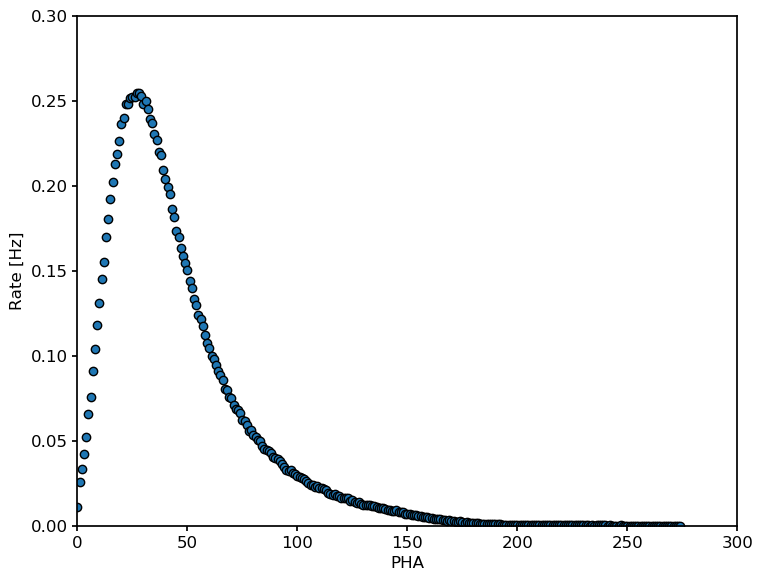

In [ ]:
from ixpeobssim.evt.binning import xBinnedCountSpectrum

pha1_file_path = pipeline.xpbin(*EVT_FILE_PATH, algorithm='PHA1')
pha1_data = xBinnedCountSpectrum.from_file_list(pha1_file_path)
pha1_data.plot()


# Pulse Folding

## Calculate phases

In [ ]:
folded_EVT_FILE_PATH=pipeline.xptimetophase(*EVT_FILE_PATH, configfile=CFG_FILE,suffix='folded')


    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Done!


## Plot the pulse profile

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


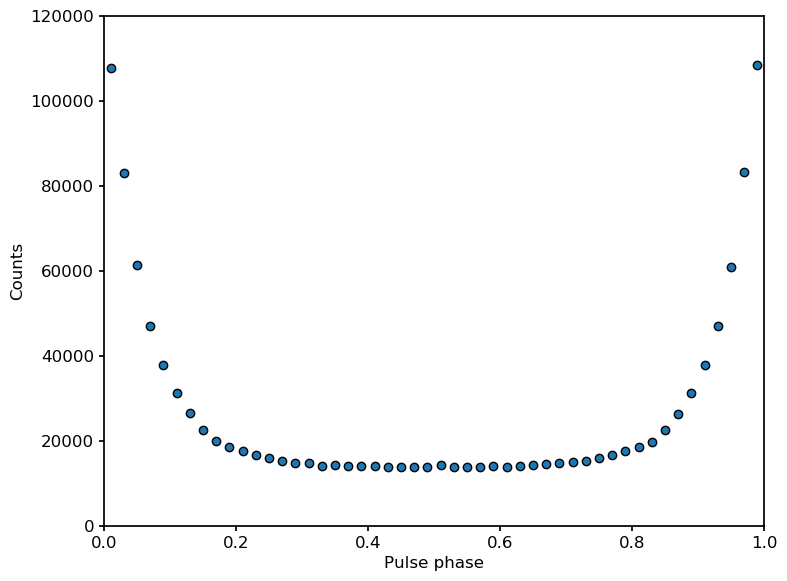

In [ ]:
from ixpeobssim.evt.binning import xBinnedPulseProfile

prof_file_path = pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='PP')
prof_data = xBinnedPulseProfile.from_file_list(prof_file_path)
prof_data.plot()


# Look at polarization    

## Divide events in phase bins

In [ ]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*folded_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits'}...


>>> Done, 36196 events out of 450186 left.


>>> Filtering in place event file (36196 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36196R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   36196R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits'}...


>>> Done, 35799 events out of 451198 left.


>>> Filtering in place event file (35799 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35799R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   35799R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits'}...


>>> Done, 35791 events out of 451669 left.


>>> Filtering in place event file (35791 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35791R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   35791R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits'}...


>>> Done, 27497 events out of 450186 left.


>>> Filtering in place event file (27497 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27497R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27497R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits'}...


>>> Done, 27708 events out of 451198 left.


>>> Filtering in place event file (27708 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27708R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27708R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits'}...


>>> Done, 27764 events out of 451669 left.


>>> Filtering in place event file (27764 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27764R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27764R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26518R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   26518R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
…

>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits'}...


>>> Done, 26956 events out of 451669 left.


>>> Filtering in place event file (26956 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26956R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   26956R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits'}...


>>> Done, 9627 events out of 450186 left.


>>> Filtering in place event file (9627 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9627R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9627R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits'}...


>>> Done, 9485 events out of 451198 left.


>>> Filtering in place event file (9485 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9485R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9485R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits'}...


>>> Done, 9584 events out of 451669 left.


>>> Filtering in place event file (9584 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9584R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9584R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits'}...


>>> Done, 9440 events out of 450186 left.


>>> Filtering in place event file (9440 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9440R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9440R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits'}...


>>> Done, 9583 events out of 451198 left.


>>> Filtering in place event file (9583 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9583R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9583R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits'}...


>>> Done, 9339 events out of 451669 left.


>>> Filtering in place event file (9339 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9339R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9339R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits'}...


>>> Done, 9342 events out of 450186 left.


>>> Filtering in place event file (9342 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9342R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9342R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits'}...


>>> Done, 9251 events out of 451198 left.


>>> Filtering in place event file (9251 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9251R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9251R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits'}...


>>> Done, 9488 events out of 451669 left.


>>> Filtering in place event file (9488 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9488R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9488R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits'}...


>>> Done, 9199 events out of 450186 left.


>>> Filtering in place event file (9199 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9199R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9199R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits'}...


>>> Done, 9141 events out of 451198 left.


>>> Filtering in place event file (9141 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9141R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9141R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits'}...


>>> Done, 9257 events out of 451669 left.


>>> Filtering in place event file (9257 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9257R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9257R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits'}...


>>> Done, 9280 events out of 450186 left.


>>> Filtering in place event file (9280 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9280R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9280R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits'}...


>>> Done, 9181 events out of 451198 left.


>>> Filtering in place event file (9181 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9181R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9181R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits'}...


>>> Done, 9228 events out of 451669 left.


>>> Filtering in place event file (9228 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9228R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9228R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits'}...


>>> Done, 9353 events out of 450186 left.


>>> Filtering in place event file (9353 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9353R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9353R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits'}...


>>> Done, 9365 events out of 451198 left.


>>> Filtering in place event file (9365 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9365R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9365R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits'}...


>>> Done, 9317 events out of 451669 left.


>>> Filtering in place event file (9317 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9317R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9317R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits'}...


>>> Done, 9222 events out of 450186 left.


>>> Filtering in place event file (9222 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9222R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9222R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits'}...


>>> Done, 9261 events out of 451198 left.


>>> Filtering in place event file (9261 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9261R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9261R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits'}...


>>> Done, 9367 events out of 451669 left.


>>> Filtering in place event file (9367 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9367R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9367R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits'}...


>>> Done, 9352 events out of 450186 left.


>>> Filtering in place event file (9352 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9352R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9352R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits'}...


>>> Done, 9238 events out of 451198 left.


>>> Filtering in place event file (9238 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9238R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9238R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits'}...


>>> Done, 9152 events out of 451669 left.


>>> Filtering in place event file (9152 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9152R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9152R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits'}...


>>> Done, 9453 events out of 450186 left.


>>> Filtering in place event file (9453 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9453R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9453R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits'}...


>>> Done, 9352 events out of 451198 left.


>>> Filtering in place event file (9352 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9352R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9352R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits'}...


>>> Done, 9327 events out of 451669 left.


>>> Filtering in place event file (9327 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9327R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9327R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits'}...


>>> Done, 9648 events out of 450186 left.


>>> Filtering in place event file (9648 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9648R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9648R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits'}...


>>> Done, 9856 events out of 451198 left.


>>> Filtering in place event file (9856 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9856R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9856R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits'}...


>>> Done, 9794 events out of 451669 left.


>>> Filtering in place event file (9794 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9794R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   9794R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits'}...


>>> Done, 26619 events out of 450186 left.


>>> Filtering in place event file (26619 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26619R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   26619R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits'}...


>>> Done, 26810 events out of 451198 left.


>>> Filtering in place event file (26810 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26810R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   26810R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits'}...


>>> Done, 26761 events out of 451669 left.


>>> Filtering in place event file (26761 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26761R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   26761R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits'}...


>>> Done, 6189 events out of 450186 left.


>>> Filtering in place event file (6189 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6189R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6189R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits'}...


>>> Done, 6240 events out of 451198 left.


>>> Filtering in place event file (6240 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6240R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6240R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits'}...


>>> Done, 6083 events out of 451669 left.


>>> Filtering in place event file (6083 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6083R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6083R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits'}...


>>> Done, 6638 events out of 450186 left.


>>> Filtering in place event file (6638 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6638R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6638R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits'}...


>>> Done, 6594 events out of 451198 left.


>>> Filtering in place event file (6594 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6594R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6594R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits'}...


>>> Done, 6565 events out of 451669 left.


>>> Filtering in place event file (6565 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6565R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   6565R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits'}...


>>> Done, 7484 events out of 450186 left.


>>> Filtering in place event file (7484 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7484R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7484R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits'}...


>>> Done, 7435 events out of 451198 left.


>>> Filtering in place event file (7435 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7435R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7435R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits'}...


>>> Done, 7558 events out of 451669 left.


>>> Filtering in place event file (7558 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7558R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   7558R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits'}...


>>> Done, 8666 events out of 450186 left.


>>> Filtering in place event file (8666 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8666R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8666R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits'}...


>>> Done, 8832 events out of 451198 left.


>>> Filtering in place event file (8832 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8832R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8832R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits'}...


>>> Done, 8874 events out of 451669 left.


>>> Filtering in place event file (8874 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8874R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   8874R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits'}...


>>> Done, 10420 events out of 450186 left.


>>> Filtering in place event file (10420 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10420R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   10420R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits'}...


>>> Done, 10440 events out of 451198 left.


>>> Filtering in place event file (10440 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10440R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   10440R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits'}...


>>> Done, 10369 events out of 451669 left.


>>> Filtering in place event file (10369 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10369R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   10369R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits'}...


>>> Done, 12605 events out of 450186 left.


>>> Filtering in place event file (12605 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12605R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12605R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits'}...


>>> Done, 12632 events out of 451198 left.


>>> Filtering in place event file (12632 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12632R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12632R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits'}...


>>> Done, 12539 events out of 451669 left.


>>> Filtering in place event file (12539 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12539R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12539R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits'}...


>>> Done, 15548 events out of 450186 left.


>>> Filtering in place event file (15548 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15548R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15548R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits'}...


>>> Done, 15694 events out of 451198 left.


>>> Filtering in place event file (15694 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15694R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15694R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits'}...


>>> Done, 15737 events out of 451669 left.


>>> Filtering in place event file (15737 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15737R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15737R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits'}...


>>> Done, 20045 events out of 450186 left.


>>> Filtering in place event file (20045 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20045R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   20045R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits'}...


>>> Done, 20164 events out of 451198 left.


>>> Filtering in place event file (20164 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20164R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   20164R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits'}...


>>> Done, 20626 events out of 451669 left.


>>> Filtering in place event file (20626 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20626R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   20626R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits'}...


>>> Done, 27753 events out of 450186 left.


>>> Filtering in place event file (27753 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27753R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27753R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits'}...


>>> Done, 27640 events out of 451198 left.


>>> Filtering in place event file (27640 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27640R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27640R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits'}...


>>> Done, 27763 events out of 451669 left.


>>> Filtering in place event file (27763 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27763R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   27763R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits'}...


>>> Done, 36199 events out of 450186 left.


>>> Filtering in place event file (36199 out of 450186 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36199R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   36199R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits'}...


>>> Done, 36233 events out of 451198 left.


>>> Filtering in place event file (36233 out of 451198 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36233R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   36233R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits'}...


>>> Done, 35973 events out of 451669 left.


>>> Filtering in place event file (35973 out of 451669 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35973R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   35973R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


## Generate MCUBE files

This contain the Stokes parameters for each energy and phase bin.

In [ ]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36196R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   36196R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35799R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   35799R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35791R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   35791R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27497R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27497R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27708R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27708R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27764R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27764R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20411R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   20411R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26624R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26624R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26518R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26518R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26956R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26956R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9627R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9627R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9485R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9485R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9584R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9584R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9440R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9440R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9583R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9583R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9339R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9339R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9342R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9342R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9251R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9251R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9488R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9488R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9199R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9199R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9141R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9141R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9257R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9257R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9280R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9280R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9181R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9181R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9228R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9228R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9353R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9353R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9365R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9365R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9317R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9317R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9222R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9222R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9261R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9261R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9367R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9367R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9352R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9352R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9238R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9238R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9152R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9152R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9453R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9453R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9352R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9352R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9327R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9327R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9648R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9648R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9856R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9856R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   9794R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   9794R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26619R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26619R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26810R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26810R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   26761R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   26761R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6189R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6189R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6240R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6240R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6083R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6083R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6638R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6638R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6594R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6594R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   6565R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   6565R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7484R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7484R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7435R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7435R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   7558R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   7558R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8666R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8666R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8832R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8832R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   8874R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   8874R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10420R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   10420R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10440R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   10440R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   10369R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   10369R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12605R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12605R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   

>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12632R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12632R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12539R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12539R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15548R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15548R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15694R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15694R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15737R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15737R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20045R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   20045R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20164R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   20164R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   20626R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   20626R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27753R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27753R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27640R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27640R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   27763R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   27763R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36199R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   36199R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   

>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   36233R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   36233R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   35973R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   35973R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


## Load the MCUBE data into Python

In [ ]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot the polarization degree

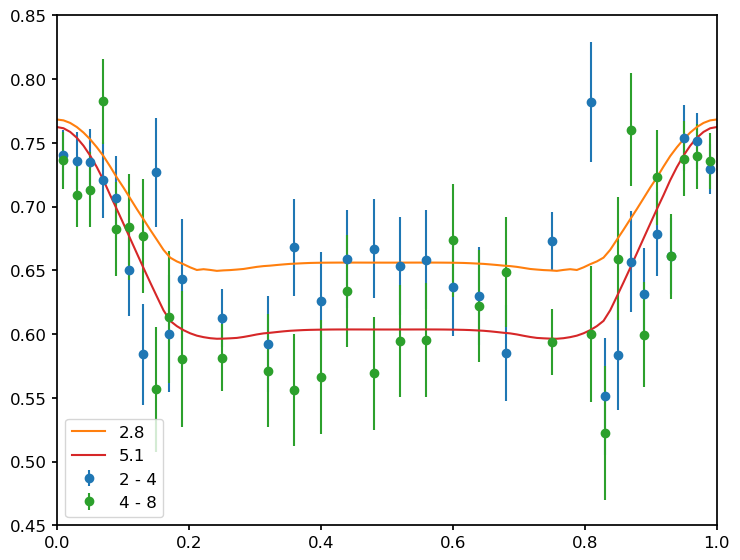

In [ ]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.mean(emean[i,:])
    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()

## Plot the polarization angle

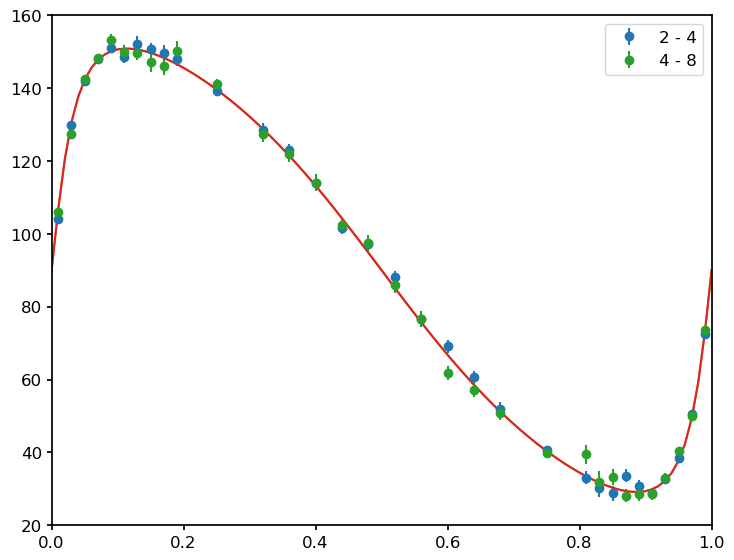

In [ ]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.mean(emean[i,:])
    plt.plot(phase, np.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Look at phase-averaged polarization

## Create an MCUBE with finer energy bins

In [ ]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   450186R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   450186R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451198R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451198R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   451669R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   451669R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits']

## Load the MCUBE data into Python

In [ ]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in folded_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot angle vs. energy

<ErrorbarContainer object of 3 artists>

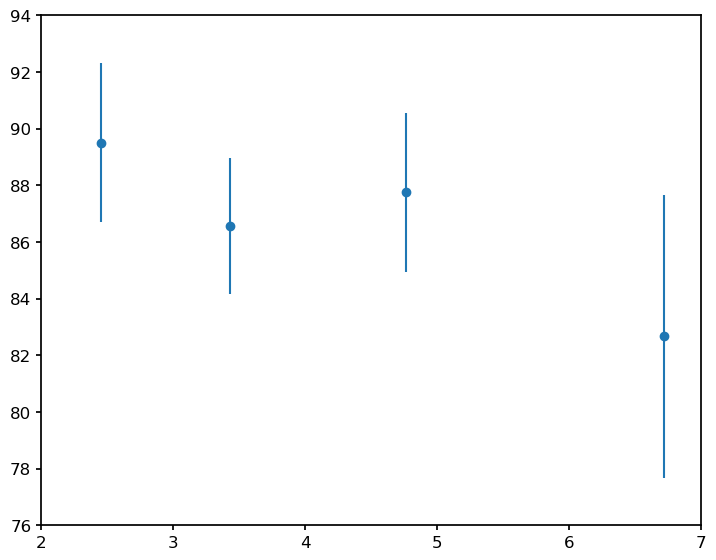

In [ ]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot polarization degree vs energy

<ErrorbarContainer object of 3 artists>

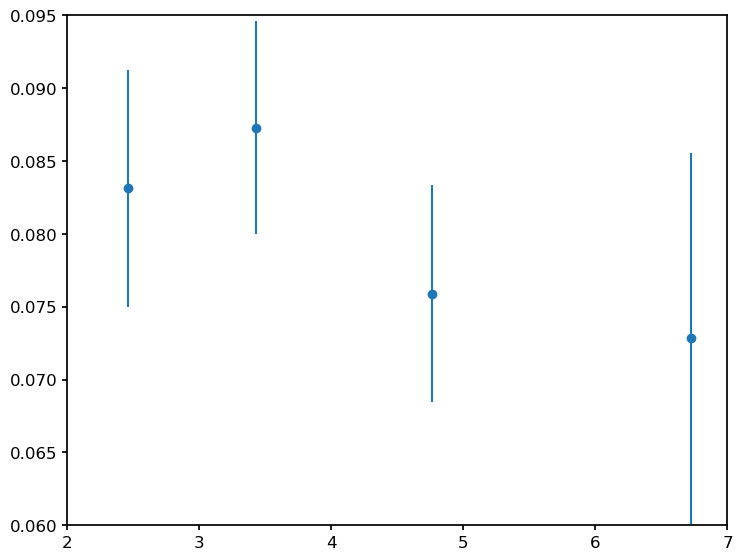

In [ ]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')